In [1]:
import os
import requests
from dotenv import find_dotenv, load_dotenv
import pandas as pd

In [2]:
load_dotenv(find_dotenv())

True

In [7]:
## NVE

In [3]:
NVE_URL = os.environ.get('NVE_URL')

In [4]:
data = requests.get(NVE_URL).json()
sorted_data = sorted(data, key=lambda x: x["dato_Id"])
df = pd.DataFrame.from_dict(sorted_data)
df.set_index("dato_Id", inplace=True)
df.index = pd.to_datetime(df.index)

In [5]:
df = df[df['omrType'] == 'NO']

In [6]:
df.head()

,endring_fyllingsgrad,fylling_TWh,fyllingsgrad,fyllingsgrad_forrige_uke,iso_aar,iso_uke,kapasitet_TWh,neste_Publiseringsdato,omrType,omrnr
dato_Id,,,,,,,,,,
1995-01-08,-0.146484,52.743507,0.606044,0.752528,1995,1,87.02918,0001-01-01T00:00:00,NO,0
1995-01-15,-0.025788,50.504530,0.580317,0.606105,1995,2,87.02918,0001-01-01T00:00:00,NO,0
1995-01-22,-0.020010,48.757630,0.560245,0.580255,1995,3,87.02918,0001-01-01T00:00:00,NO,0
1995-01-29,-0.028322,46.294876,0.531947,0.560269,1995,4,87.02918,0001-01-01T00:00:00,NO,0
1995-02-05,-0.027902,43.866615,0.504045,0.531947,1995,5,87.02918,0001-01-01T00:00:00,NO,0


In [7]:
df.to_csv('../data/interim/nve.csv')

In [8]:
## System Price Nordic

In [9]:
data = pd.read_excel('../data/raw/Nordic Hydro Balance 1990_wk 41 2016_FC.xlsx', sheet_name='Hydro vs spot price', header=1)

In [10]:
data.head()

,Unnamed: 0,Hydro.balance,System price [SYS] in [EUR/MWh],Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,199901,-3759.445160,16.18,NaN,NaT,NaN,NaN,NaN,NaN
1,199902,-3390.791866,16.72,NaN,NaT,NaN,NaN,NaN,NaN
2,199903,-538.376659,14.81,NaN,NaT,NaN,NaN,NaN,NaN
3,199904,-3059.071505,16.29,NaN,NaT,NaN,NaN,NaN,NaN
4,199905,643.711903,14.75,NaN,NaT,NaN,NaN,NaN,NaN


In [105]:
data = data[[data.columns[0], 'System price [SYS] in [EUR/MWh]']]

In [106]:
data.rename(columns={data.columns[0]: 'date'}, inplace=True)

In [107]:
data.dropna(inplace=True)

In [108]:
data['date'] = data['date'].astype(int)

In [109]:
data['date'] = pd.to_datetime(data['date'].astype(str) + '1', format='%Y%W%w')

In [110]:
data.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

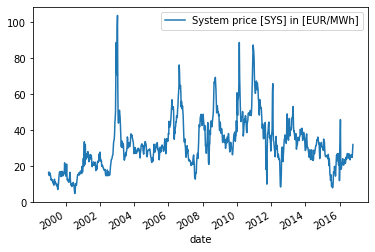

In [111]:
data.plot()

In [112]:
data.to_csv('../data/interim/system_price.csv')

In [86]:
## Swedish filling level

In [113]:
data = pd.read_excel('../data/raw/Mag_2000-_SE.2015-.xlsx', sheet_name='1950-', header=2, index_col='Vecka')

In [114]:
data.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Vecka,,,,,,,,,,,,,,,,,,,,
1.0,NaN,60.7,73.4,67.3,40.6,46.4,61.9,64.0,65.3,69.9,50.9,50.68,41.96,74.65,64.82,65.3,59.0,66.9,51.1,63.7
2.0,NaN,58.4,70.2,65.1,37.9,43.9,59.1,60.5,63.7,67.1,48.1,46.92,39.27,72.09,60.94,63.6,57.0,63.0,49.1,60.2
3.0,NaN,55.5,66.3,64.2,35.5,41.2,56.2,56.5,61.2,64.5,45.4,43.14,36.65,69.19,56.78,60.2,54.8,58.8,46.7,56.9
4.0,NaN,52.4,62.9,61.7,33.0,38.0,52.8,53.0,57.7,61.5,42.8,39.17,33.95,65.35,52.58,56.3,51.3,56.3,44.7,54.1
5.0,NaN,49.3,58.7,59.4,29.9,34.9,49.4,50.6,54.2,58.2,39.5,35.54,31.34,60.87,49.44,52.5,48.8,53.3,42.0,50.9


In [115]:
data.to_csv('../data/interim/sweden.csv')

In [ ]:
[149, 378, 2, 360, 7, 290, 637, 203, 204, 225, 422, 601]